# Convolutional Neural Network

In this notebook, we will begin our exploration of introductory computer vision concepts by building a small convolutional neural network to perform a classification task. We will use the `tf_flowers` dataset from `tensorflow_datasets`, which consists of images of five classes of flowers: tulips, sunflowers, dandelions, roses, and daisies.

Let's begin by importing the required modules.

In [1]:
import keras
from keras import layers
import tensorflow_datasets as tfds

Next, we use the `load` method to retrieve the dataset and `cardinality` method to get the number of samples present in the dataset.

In [2]:
dataset = tfds.load('tf_flowers', split=['train'], as_supervised=True)[0]
print("Number of samples in dataset:", dataset.cardinality().numpy())

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Number of samples in dataset: 3670


Now, we split the dataset into training, testing and validation sets. The dataset contains *3670* samples. We will use 70% of the dataset for training, 15% for testing and 15% for validation.

Number of samples in training set = int(3670*0.7) = 2569

Number of samples in validation set = int(3670*0.15) = 550

Number of samples in test set = 3670 - (550+2569) = 551

_Note: We can use `cardinality()` along with `int()` to calculate the size of each set in code._

We use the `take` method to select 2569 samples from the dataset to form the training set. Then, we create a new dataset called `remaining_ds` to refer to the samples left after taking 2569 samples from the dataset using `skip`. After that, we take 550 samples from `remaining_ds` to create the validation set and `skip` these samples to create the test set.

In [3]:
train_ds = dataset.take(2569)
remaining_ds = dataset.skip(2569)
val_ds = remaining_ds.take(550)
test_ds = remaining_ds.skip(550)
print("Number of samples in training set:", train_ds.cardinality().numpy())
print("Number of samples in validation set:", val_ds.cardinality().numpy())
print("Number of samples in test set:", test_ds.cardinality().numpy())

Number of samples in training set: 2569
Number of samples in validation set: 550
Number of samples in test set: 551


Let's visualise the images in the dataset.

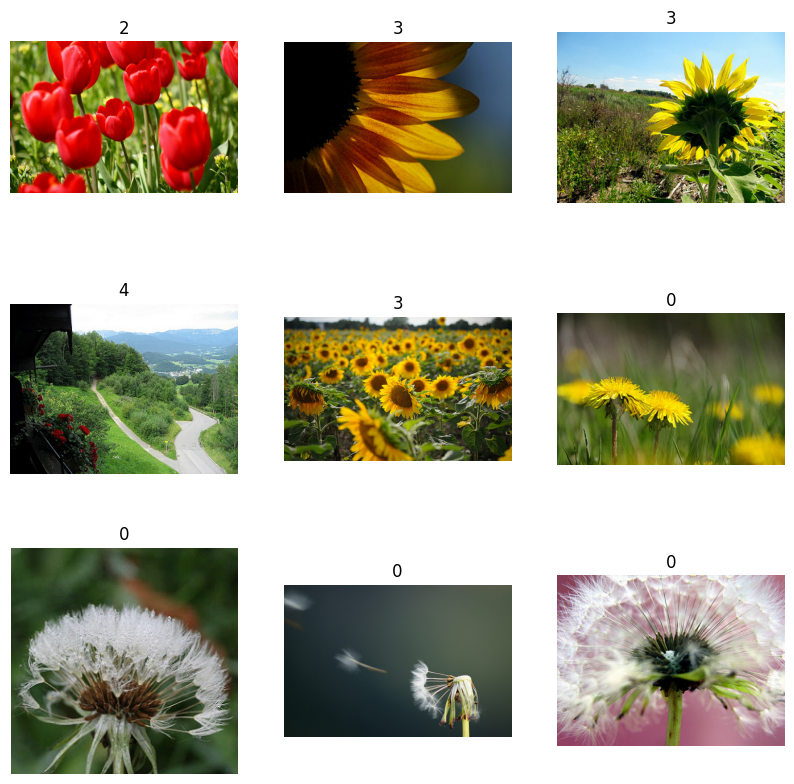

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")

Now, let's resize the images to 180x180 pixels using the `Resizing` layer from `Keras`.

In [5]:
train_ds = train_ds.map(lambda x, y: (layers.Resizing(180,180)(x), y))
val_ds = val_ds.map(lambda x, y: (layers.Resizing(180,180)(x), y))
test_ds = test_ds.map(lambda x, y: (layers.Resizing(180,180)(x), y))

We create batches of 64 images using `batch` method.

In [6]:
train_ds = train_ds.batch(64)
val_ds = val_ds.batch(64)
test_ds = test_ds.batch(64)

Next, we create our model using the `Sequential` class from `Keras`. It consists of four convolutional layers, each followed by a max-pooling layer. The output from the convolutional layers is flattened and passed to a fully connected layer with a softmax activation function for class prediction.

In [7]:
model = keras.Sequential()

model.add(keras.Input(shape=(180,180,3)))

model.add(layers.Conv2D(128, kernel_size=(3,3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, kernel_size=(3,3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(256, kernel_size=(3,3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(256, kernel_size=(3,3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(units=5, activation="softmax"))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 178, 178, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │         103,685 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,140,101 (4.35 MB)

 Trainable params: 1,140,101 (4.35 MB)

 Non-trainable params: 0 (0.00 B)

We compile our model using the `sparse_categorical_crossentropy` loss because our labels are encoded as integers. We use `accuracy` as the metric and train the model for 15 epochs using the `adam` optimizer.

_Note: Use categorical_crossentropy as the loss when your labels are one-hot encoded._

In [8]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 56s 864ms/step - accuracy: 0.2668 - loss: 24.2958 - val_accuracy: 0.4036 - val_loss: 1.2839
Epoch 2/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 307ms/step - accuracy: 0.4813 - loss: 1.2266 - val_accuracy: 0.5600 - val_loss: 1.1328
Epoch 3/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 342ms/step - accuracy: 0.5646 - loss: 1.0829 - val_accuracy: 0.5673 - val_loss: 1.1459
Epoch 4/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 343ms/step - accuracy: 0.6124 - loss: 1.0075 - val_accuracy: 0.6018 - val_loss: 1.0683
Epoch 5/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 341ms/step - accuracy: 0.6636 - loss: 0.8738 - val_accuracy: 0.6055 - val_loss: 1.0492
Epoch 6/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 326ms/step - accuracy: 0.6919 - loss: 0.7797 - val_accuracy: 0.6000 - val_loss: 1.1387
Epoch 7/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 369ms/step - accuracy: 0.7209 - loss: 0.7123 - val_accuracy: 0.6073 - val_loss: 1.1634
Epoch 8/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 312ms/step - accuracy: 0.7631 - loss: 0.6608 - val_acc

Now, we evaluate our model on the test set and display the accuracy and loss.

In [10]:
test_loss, test_accuracy = model.evaluate(test_ds)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.6277 - loss: 1.4953
Test Loss: 1.5186667442321777
Test Accuracy: 0.6460980176925659


Our small CNN achieved an accuracy of **64.61%** on the test set. However, we can improve this performance by augmenting our dataset and tuning our hyperparameters. In the next notebook, we will explore data augmentation techniques using Keras.